In [4]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [5]:
img_array = cv2.imread("Trained_dataset/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)


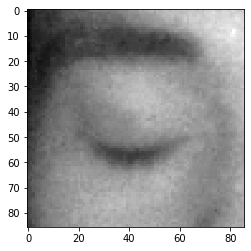

In [6]:
plt.imshow(img_array, cmap="gray")

In [7]:
img_array.shape

(86, 86)

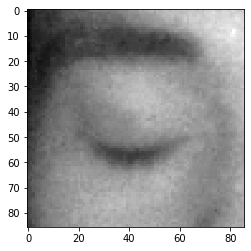

In [8]:
Datadirectory = "Test_dataset/"
Classes = ["Closed_Eyes", "Open_Eyes"]
for category in Classes: 
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

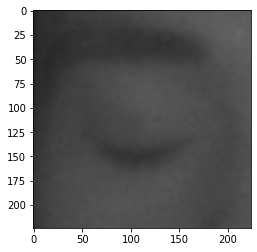

In [9]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap ="gray")
plt.show()

In [10]:
training_Data = []
def create_training_Data():
    for category in Classes: 
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

2544


In [13]:
import random
random.shuffle(training_Data)

In [14]:
X = []
y = []
for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)


In [15]:
X.shape

(2544, 224, 224, 3)

In [16]:
X = X/255.0

In [17]:
Y = np.array(y)

In [18]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
17227776/17225924 [==============================] - 6s 0us/step


In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [22]:
base_input = model.layers[0].input

In [23]:
base_output = model.layers[-4].output

In [25]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [26]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [27]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [28]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [29]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)

Train on 2289 samples, validate on 255 samples
2289/2289 [==============================] - 1492s 652ms/sample - loss: 0.1409 - acc: 0.9620 - val_loss: 0.5720 - val_acc: 0.7569


In [30]:
new_model.save('my_model.h5')

In [31]:
new_model = tf.keras.models.load_model('my_model_Drowsiness.h5')

OSError: Unable to open file (unable to open file: name = 'my_model_Drowsiness.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [32]:
img_array = cv2.imread('s0014_04235_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [33]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [34]:
X_input.shape

(1, 224, 224, 3)

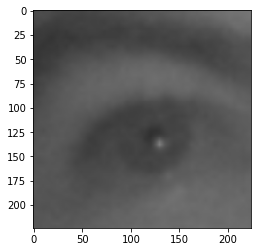

In [35]:
plt.imshow(new_array)

In [36]:
X_input= X_input/255.0

In [37]:
prediction = new_model.predict(X_input)

In [38]:
prediction

array([[0.93323016]], dtype=float32)

In [50]:
img = cv2.imread("personn.jpg")

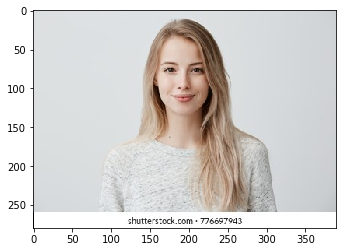

In [51]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [52]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [53]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [55]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [56]:
for(x, y, w, h) in eyes: 
    cv2.rectangle(img, (x,y),(x+w, y+h),(0,255,0), 2)

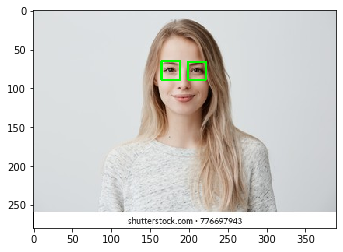

In [57]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [59]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes: 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not detected")
    else: 
        for(ex, ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

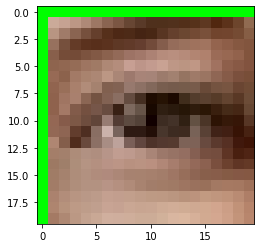

In [60]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [61]:
eyes_roi.shape

(20, 20, 3)

In [62]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [63]:
final_image.shape

(1, 224, 224, 3)

In [64]:
new_model.predict(final_image)

array([[0.99989843]], dtype=float32)

In [70]:
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True: 
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes: 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y: y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else: 
            for(ex, ey, ew, eh) in eyess: 
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
                
    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions > 0):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame, status, (50,50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow("Drowsiness Detection", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
